[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/adams/blob/master/exercises/tut6_LSTM_student.ipynb)

# Exercise LSTM time series forecasting
In this exercise, we will illustrate the deficiencies of feedforward networks when the data is time-dependent (time series data). Time series or sequence data come in Rank-3 tensor, i.e. `(batch, timesteps, features)`. You will see how recurrent neural networks can overcome these deficiencies. We simulate a very simple time series, and your task will be to fit a feedforward network and an LSTM and compare their predictions. 

When fitting a model to time series data, you must choose the time lag order. Here we keep things simple and choose a lag order of 1. This means we build models which predict $y_{t}$ based on the feature $y_{t-1}$.

You can use the demo notebooks in [demos/rnn](https://github.com/Humboldt-WI/adams/tree/master/demos/rnn) to see further details on how to fit LSTMs.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import keras
from tensorflow.keras import layers

In [2]:
## Simulate time series
time_window = np.arange(120)
ts = np.sin(time_window)

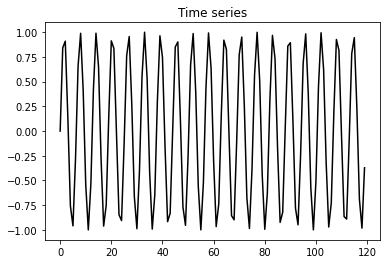

In [3]:
## Plot time series
plt.plot(time_window, ts, color = 'black')
plt.title('Time series')
plt.show()

## Exercise 1
Transform the time series data `ts` into a target 
$$y=\left(\begin{array}{cc} 
y_{1} \\
y_{2}  \\
\vdots  \\
y_{t-1} \\
y_{t} 
\end{array}\right)
$$ 
and a feature matrix (with only one column) 
$$X=\left(\begin{array}{cc} 
y_{0}\\
y_{1} \\
\vdots \\
y_{t-2}\\
y_{t-1}
\end{array}\right)
$$
Choose the first 80 observations as training data, the next 20 as validation and the remaining observations as test data. Use the function `create_dataset`, provided below.

In [17]:
## prepare data for model building
def create_dataset(time_series, window_size):
    """ Function to create data set with lagged response values for estimating an autoregressive model"""
    dataX, dataY = [], []
    
    for i in range(0,len(time_series) - window_size):
        x = np.reshape(time_series[i:i + window_size],(-1,1)) # Remember: x[a:b-1]
        dataX.append(x)
        y = time_series[i + window_size] # Remember: x[b]
        dataY.append(y)
           
    return np.array(dataX), np.array(dataY)

## Exercise 2
Fit a feedforward network of your choice and make predictions on the training and test set. Plot the predictions in comparison to the time series `y`.

# Exercise 3
Now fit an LSTM of your choice and plot its predictions on the training and test set against the true values `y`.